In [1]:
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('..\\data\\interim\\X_2018.pickle', 'rb') as f:
        X = pickle.load(f)

In [3]:
with open('..\\data\\interim\\inn_2018.pickle', 'rb') as f:
        INN = pickle.load(f)

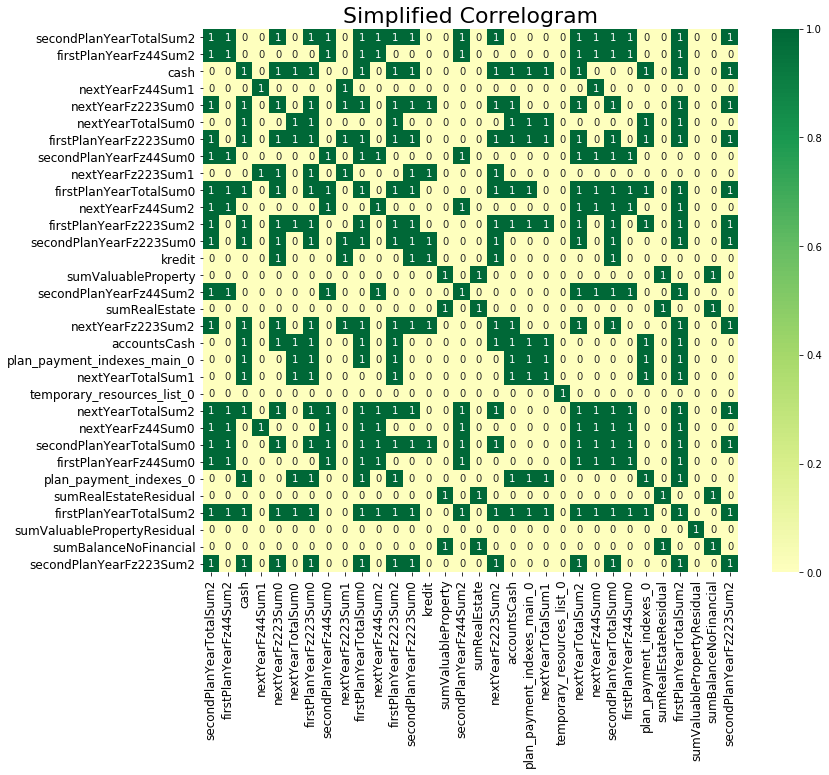

In [4]:
# we can see some correlation between our variables, we will use > 0.5 correlation to get a clearer view in our exploration

plt.figure(figsize=(12,10))
sns.heatmap(abs(X.corr().round(2))>0.5 , xticklabels=X.corr().columns, yticklabels=X.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Simplified Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('correlogram.png', dpi=100)
plt.show()

In [5]:
list_of_correlated_columns = []
limit = 0.9

for i in (abs(X.corr().round(2))>limit).columns:
    for j in (abs(X.corr().round(2))>limit).columns:
        if ((abs(X.corr().round(2))>limit).loc[i,j] == True):
            list_of_correlated_columns.append((i,j))

In [6]:
# gettng rid of the pairs constructed of the same variables
list_of_correlated_columns_not_same = []

for k in range(len(list_of_correlated_columns)):
    if list_of_correlated_columns[k][0] != list_of_correlated_columns[k][1]:
        list_of_correlated_columns_not_same.append((list_of_correlated_columns[k][0], list_of_correlated_columns[k][1]))

In [7]:
list_of_correlated_columns_not_same

[('secondPlanYearTotalSum2', 'secondPlanYearTotalSum0'),
 ('firstPlanYearFz44Sum2', 'secondPlanYearFz44Sum2'),
 ('cash', 'accountsCash'),
 ('nextYearFz223Sum0', 'secondPlanYearFz223Sum0'),
 ('nextYearFz223Sum0', 'nextYearFz223Sum2'),
 ('nextYearTotalSum0', 'nextYearTotalSum1'),
 ('firstPlanYearFz223Sum0', 'firstPlanYearFz223Sum2'),
 ('secondPlanYearFz44Sum0', 'secondPlanYearFz44Sum2'),
 ('secondPlanYearFz44Sum0', 'firstPlanYearFz44Sum0'),
 ('nextYearFz44Sum2', 'nextYearFz44Sum0'),
 ('firstPlanYearFz223Sum2', 'firstPlanYearFz223Sum0'),
 ('secondPlanYearFz223Sum0', 'nextYearFz223Sum0'),
 ('secondPlanYearFz223Sum0', 'nextYearFz223Sum2'),
 ('secondPlanYearFz223Sum0', 'secondPlanYearFz223Sum2'),
 ('sumValuableProperty', 'sumRealEstate'),
 ('sumValuableProperty', 'sumRealEstateResidual'),
 ('secondPlanYearFz44Sum2', 'firstPlanYearFz44Sum2'),
 ('secondPlanYearFz44Sum2', 'secondPlanYearFz44Sum0'),
 ('sumRealEstate', 'sumValuableProperty'),
 ('sumRealEstate', 'sumRealEstateResidual'),
 ('nextYe

In [8]:
features = list(X.columns)

In [9]:
len(features)

32

In [10]:
for pairs in list_of_correlated_columns_not_same:
    if (pairs[0] in features) and (pairs[1] in features):
        # удаляем любой из двух
        features.remove(pairs[0])

In [11]:
len(features)

20

In [12]:
X = X[features].astype(float)

In [13]:
len(X)

405

In [14]:
features

['nextYearFz44Sum1',
 'nextYearFz223Sum1',
 'firstPlanYearTotalSum0',
 'firstPlanYearFz223Sum2',
 'kredit',
 'secondPlanYearFz44Sum2',
 'nextYearFz223Sum2',
 'accountsCash',
 'nextYearTotalSum1',
 'temporary_resources_list_0',
 'nextYearTotalSum2',
 'nextYearFz44Sum0',
 'secondPlanYearTotalSum0',
 'firstPlanYearFz44Sum0',
 'plan_payment_indexes_0',
 'sumRealEstateResidual',
 'firstPlanYearTotalSum2',
 'sumValuablePropertyResidual',
 'sumBalanceNoFinancial',
 'secondPlanYearFz223Sum2']

In [15]:
X.head()

,nextYearFz44Sum1,nextYearFz223Sum1,firstPlanYearTotalSum0,firstPlanYearFz223Sum2,kredit,secondPlanYearFz44Sum2,nextYearFz223Sum2,accountsCash,nextYearTotalSum1,temporary_resources_list_0,nextYearTotalSum2,nextYearFz44Sum0,secondPlanYearTotalSum0,firstPlanYearFz44Sum0,plan_payment_indexes_0,sumRealEstateResidual,firstPlanYearTotalSum2,sumValuablePropertyResidual,sumBalanceNoFinancial,secondPlanYearFz223Sum2
0,57395225.05,14485541.50,1.225714e+08,54985817.69,33664241.29,18884108.5,82999519.74,1.103241e+08,71880766.55,6336406.23,1.445494e+08,1.189451e+08,1.205666e+08,5.310000e+07,36480931.04,3.232591e+08,1.029858e+08,40060695.01,7.356332e+08,69175425.07
4,0.00,789431.36,0.000000e+00,0.00,15824.29,0.0,10409510.84,1.661932e+07,789431.36,0.00,1.146171e+07,1.052196e+06,0.000000e+00,0.000000e+00,19383429.99,2.501521e+05,0.000000e+00,0.00,4.722384e+07,0.00
6,6412893.40,2924036.03,4.458646e+07,30861141.00,23452130.52,13725320.0,32056990.63,4.879166e+07,9336929.43,0.00,5.750847e+07,3.186438e+07,4.458646e+07,1.372532e+07,10758450.53,9.216943e+07,4.251829e+07,4501339.97,2.921914e+08,30861141.00
8,0.00,0.00,2.201873e+07,22018728.75,15696845.01,0.0,38281745.00,9.575114e+04,0.00,0.00,3.891652e+07,6.347700e+05,3.232745e+07,0.000000e+00,0.00,9.214494e+05,2.201873e+07,0.00,1.591240e+07,32327453.75
11,24661366.24,0.00,1.299009e+08,0.00,18702.07,52051197.3,0.00,8.751660e+03,24661366.24,0.00,3.225583e+07,8.917303e+07,1.291536e+08,1.299009e+08,0.00,1.903956e+05,5.242487e+07,2487.57,1.400780e+06,0.00
